In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

## Part-A: Exploratory Data Analysis and Preprocessing

### Load and prepare the dataset

In [2]:
# Load dataset
df = pd.read_csv("mushrooms.csv")
print("Intial shape: ", df.shape)

Intial shape:  (8124, 23)


In [3]:
# Info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
# First 5 rows of dataset
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**As mentioned in the assignment, all features in the dataset are categorical. Let's check for null values**

In [5]:
# Print the number of null values in each column
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**There are no null values in the dataset, let's proceed to one-hot-encoding** 

In [6]:
# Extract target and features
y = df['class']
X = df.drop('class', axis=1)

# One-hot encoding using pandas.get_dummies
X_encoded = pd.get_dummies(X, drop_first=False)
print("Shape after OHE: ", X_encoded.shape)

Shape after OHE:  (8124, 117)


#### Why One-Hot Encoding is Necessary before PCA ?

The Mushroom dataset is composed entirely of **categorical features**. But PCA works on **numerical data** by finding directions (principal components) in the vector space that maximize variance.

If we directly assign each categorical labels (like "brown", "red", "white") a distinct integer and feed it to PCA, the algorithm will wrongly assume there is an **ordering**

By applying **One-Hot Encoding (OHE):**
- Each category is converted into a **binary feature (0 or 1)**.  
- This allows PCA to treat all categories fairly, without introducing artificial ordering.  

Thus, **OHE is essential** because it transforms purely categorical data into a numerical form that PCA can work with.

### Initial Analysis

**Number of columns before OHE: 23** \
**Number of columns after OHE: 117**

### Standardization

#### Why Standardization is Necessary After One-Hot Encoding

Even though one-hot encoded features are binary (0/1), their variances differ depending on category frequency (balanced vs rare categories).  
Since PCA is variance-based, features with higher variance would dominate the principal components.  

**Standardization (mean=0, variance=1)** ensures all features contribute equally, making PCA fair and meaningful.

In [7]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

## Part-B: Principal Component Analysis

### Apply PCA

In [8]:
# Apply PCA, without specifying the number of components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

### Scree Plot and Optimal Components

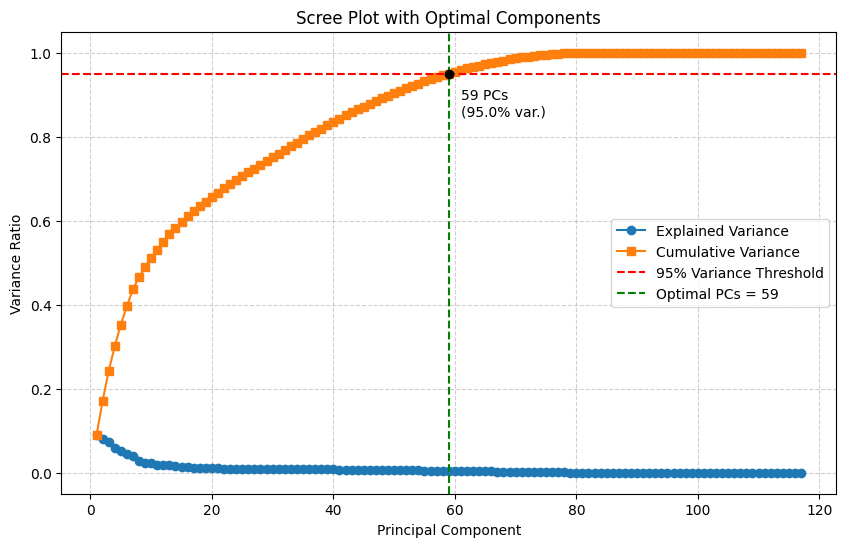

In [9]:
# Scree Plot
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

# Optimal number of PCs (retain ≥95% variance)
opt_components = np.argmax(cum_var >= 0.95) + 1

plt.figure(figsize=(10,6))

# Explained variance
plt.plot(range(1, len(explained_var)+1), explained_var, "o-", label="Explained Variance")

# Cumulative variance
plt.plot(range(1, len(cum_var)+1), cum_var, "s-", label="Cumulative Variance")

# Add threshold lines
plt.axhline(y=0.95, color='red', linestyle='--', label="95% Variance Threshold")
plt.axvline(x=opt_components, color='green', linestyle='--', label=f"Optimal PCs = {opt_components}")

# Annotate intersection
plt.scatter(opt_components, cum_var[opt_components-1], color='black', zorder=5)
plt.text(opt_components+2, cum_var[opt_components-1]-0.1, 
         f"{opt_components} PCs\n({cum_var[opt_components-1]*100:.1f}% var.)",
         fontsize=10, color='black')

plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.title("Scree Plot with Optimal Components")
plt.legend(loc="best")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

**If we aim to retain 95\% of the variance then the optimal number of principal components is 59 as we can see from the above figure**

### Visualization

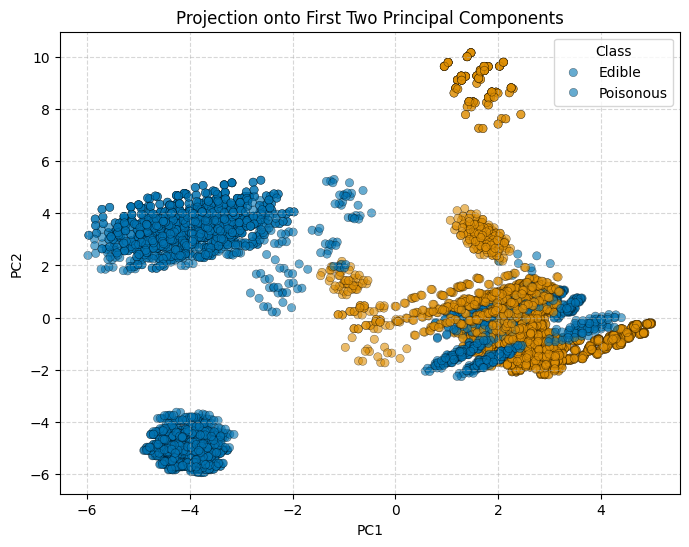

In [10]:
# First two PCs
palette = sns.color_palette("colorblind", 2)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=y,
    palette=palette,
    alpha=0.6,
    edgecolor='k',
    linewidth=0.3
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection onto First Two Principal Components")
plt.legend(title="Class", labels=["Edible", "Poisonous"], loc="best")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

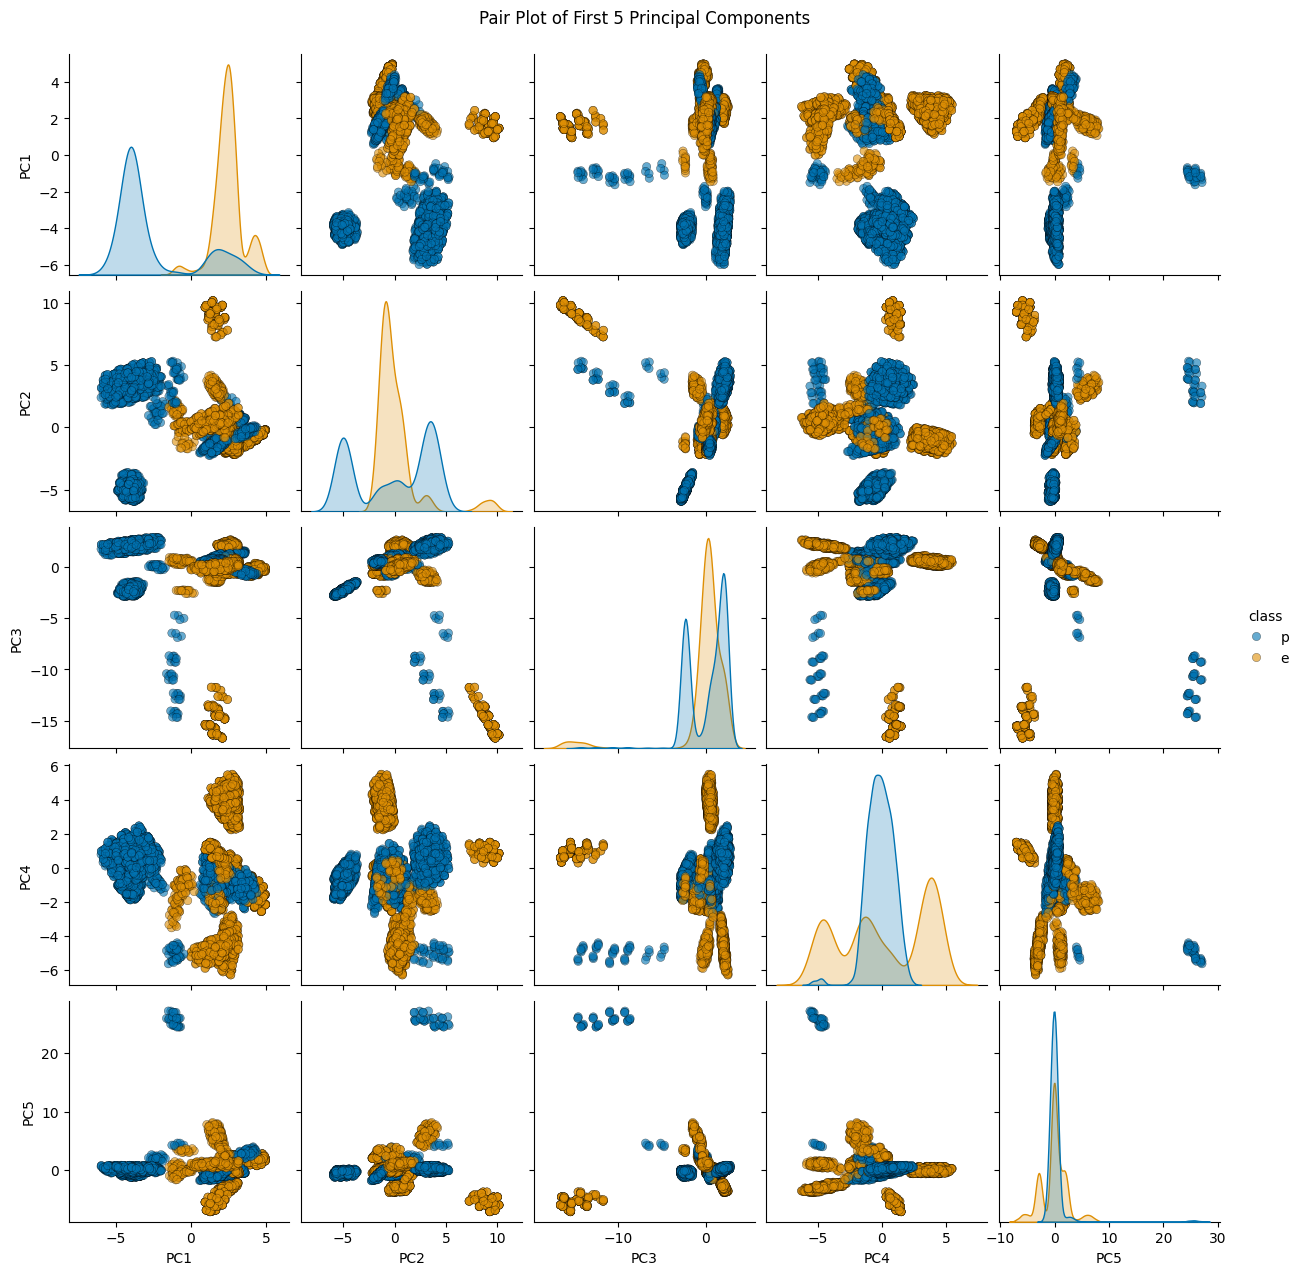

In [11]:
# Pair Plot of 5 PCs
pc_df = pd.DataFrame(X_pca[:, :5], columns=[f"PC{i+1}" for i in range(5)])
pc_df["class"] = y.values

sns.pairplot(
    pc_df,
    vars=[f"PC{i+1}" for i in range(5)],
    hue="class",
    palette=sns.color_palette("colorblind", 2),
    diag_kind="kde",
    plot_kws={"alpha":0.6, "edgecolor":"k", "linewidth":0.3}
)

plt.suptitle("Pair Plot of First 5 Principal Components", y=1.02)
plt.show()

**Discussion**
From the 2D scatter plot of the first two principal components:

- The classes (edible vs. poisonous) form **distinct clusters**, but with noticeable regions of **overlap**.
- This indicates that the first two PCs capture a large portion of the variance and already provide good discrimination between the two classes.
- However, the overlap suggests that **2D projection is not sufficient** for perfect separation.

From the pairplot of the first five PCs:

- Looking at higher-order PCs (PC3, PC4, PC5), additional structure becomes visible.
- Some class clusters separate better in certain PC combinations, reducing overlap compared to PC1–PC2 alone.
- This shows that while the first few PCs capture most variance, **class separability improves when more components are considered**

## Part-C: Performance Evaluation with Logistic Regression

### Baseline Model

In [12]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Baseline Logistic Regression
clf_original = LogisticRegression(max_iter=500, solver='lbfgs')
clf_original.fit(X_train, y_train)
y_pred_orig = clf_original.predict(X_test)

print("Baseline Logistic Regression (Original Data)")
print(classification_report(y_test, y_pred_orig))
print("Accuracy:", accuracy_score(y_test, y_pred_orig))

Baseline Logistic Regression (Original Data)
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Accuracy: 1.0


### PCA-Transformed Model

In [13]:
# PCA Transformation
pca_final = PCA(n_components=opt_components)
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

# Logistic Regression on PCA data
clf_pca = LogisticRegression(max_iter=500, solver='lbfgs')
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)

print("Logistic Regression (PCA-Transformed Data)")
print(classification_report(y_test, y_pred_pca))
print("Accuracy:", accuracy_score(y_test, y_pred_pca))

Logistic Regression (PCA-Transformed Data)
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Accuracy: 0.9987692307692307


### Comparison and Analysis

**1. Performance Difference**  
The performance difference between Logistic Regression on the original data and on PCA-transformed data is typically small.  
- PCA reduces dimensionality and removes collinearity, which can simplify the model and reduce overfitting.  
- However, dimensionality reduction comes with some **information loss**, so accuracy may drop slightly compared to the original dataset as seen above. 
- If the dataset has many redundant features (as in the Mushroom dataset), PCA can sometimes achieve comparable performance with far fewer dimensions offering speed in training and aid in visualization.
    
**2. Benefit of PCA**  
PCA helps by handling **feature collinearity and redundancy**, making the feature space more compact and efficient.  
- Even if accuracy is not dramatically improved, PCA leads to **simpler models**, faster training, and better interpretability.  
- In some cases, PCA can also improve generalization by removing noisy or less-informative dimensions.  

**3. Logistic Regression as Surrogate Evaluator**  
Logistic Regression is a **linear model**.  
- Using LR as a surrogate is reasonable but may **underestimate** PCA's usefulness, as PCA can't make a data linearly separable, using a linear model for classification doesn't do justice as the gain in performance we get through lower dimensional representation albeit non-linearly separable data isn't pronounced here.

**Conclusion:**  
PCA provides a trade-off: it reduces dimensionality and redundancy at the cost of some information loss. Logistic Regression serves as a meaningful but limited tool to evaluate PCA’s effectiveness in preparing the feature space.